# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON441B/Data/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.) US perm Visas csv from cycle using zip extractor


In [4]:
#Done in 0.)

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [5]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [6]:
df_select = df[["class_of_admission", "application_type", "us_economic_sector", "employer_city", "case_status"]]
df.case_status

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

# 3.) Clean your data for a decision tree


In [7]:
df_select.isnull().any()

#Missing values identified 

class_of_admission     True
application_type       True
us_economic_sector     True
employer_city          True
case_status           False
dtype: bool

In [8]:
df_select.dropna(inplace=True)

len(df_select)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


122833

In [9]:
dummies = pd.get_dummies(df_select[['class_of_admission', 'application_type', 'us_economic_sector', 'employer_city']])

In [10]:
X = pd.concat([dummies], axis = 1) 

In [11]:
y = df_select["case_status"]

# 4.) Fit and plot a decision tree of depth 3 （X）


In [12]:
from sklearn import tree

In [13]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

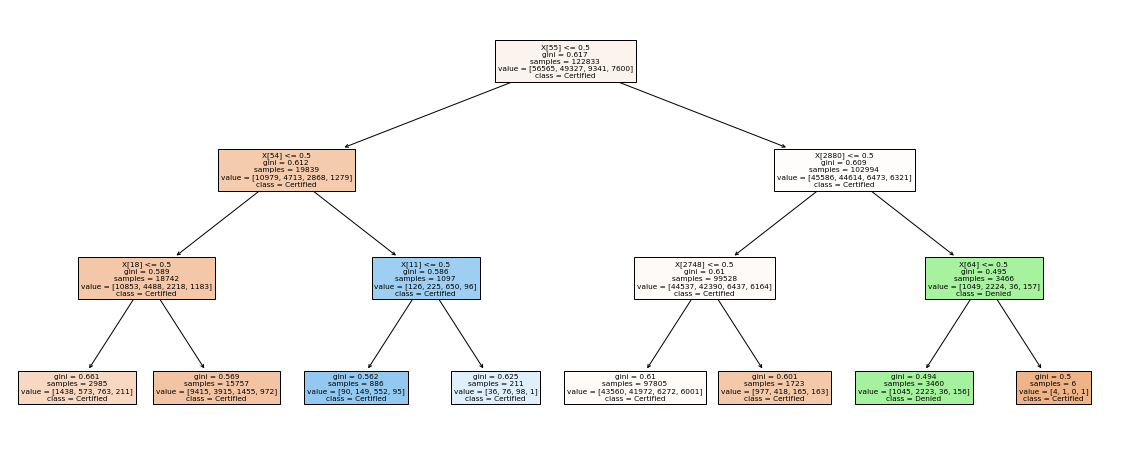

In [14]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf, class_names = y, filled = True)
plt.show()

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node is the white node shown above containing 68446 samples. The prediction of the node is "certified", which is the majority class of the samples that reach that leaf node. The leaf node represents a group of samples that have similar characteristics and therefore end up in the same prediction class. The size of the leaf node is determined by the number of samples that are in that group.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
outputs = []

In [17]:
max_depth = [1, 2, 3, 4, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
for md in max_depth:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  oos_accuracy = accuracy_score(y_test, y_pred)
  outputs.append(oos_accuracy)

In [19]:
print(outputs)

[0.46187245590230663, 0.47598371777476256, 0.47598371777476256, 0.4769877883310719, 0.4767706919945726]


In [20]:
largest_output = max(outputs)
index = outputs.index(largest_output)
print("The best max_depth is ", index, "with an out-of sample accuracy of", largest_output)


The best max_depth is  3 with an out-of sample accuracy of 0.4769877883310719
